In [63]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from read_ap import read_qrels

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/choenes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/choenes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [159]:
all_queries = set(range(0,201))
validation_queries = set(range(76,101))
test_queries = all_queries - validation_queries

vec_models = ['word2vec', 'doc2vec']
dimension_params = [200, 300, 400, 500]
window_params = [5, 10, 15, 20]
vocab_params = ['10k', '25k', '50k', '100k', '200k']

topic_models = ['lsi_bow', 'lsi_tfidf', 'LDA']
topic_params = [10, 20, 50, 100, 500, 1000, 2000]

In [120]:
def load_performance(json_path):
    with open(json_path) as json_file:
        data = json.load(json_file)
    results = defaultdict(list)
    aggregates = {}
    for q in data:
        results['all_map'].append(data[q]["map"])
        results['all_ndcg'].append(data[q]["ndcg"])
        if int(q) in validation_queries:
            results['valid_map'].append(data[q]["map"])
            results['valid_ndcg'].append(data[q]["ndcg"])
        if int(q) in test_queries:
            results['test_map'].append(data[q]["map"])
            results['test_ndcg'].append(data[q]["ndcg"])
    for k in results:
        aggregates[k] = sum(results[k])/len(results[k])
    return aggregates
        

In [160]:
performance_dict_default = {}
num_topics = 500 # change this value to display result of models with other k value
for model in topic_models:
    json_name = "./"+ model + str(num_topics)+".json"
    aggregates = load_performance(json_name)
    performance_dict_default[model] = aggregates
    print(model)
    for k in aggregates:
        print(f"\t - {k} ---> {aggregates[k]}")

lsi_bow
	 - all_map ---> 0.08339082632172119
	 - all_ndcg ---> 0.4560114300809156
	 - test_map ---> 0.08876945262442269
	 - test_ndcg ---> 0.4628484325983793
	 - valid_map ---> 0.05671283986032173
	 - valid_ndcg ---> 0.42209989759429545
lsi_tfidf
	 - all_map ---> 0.07731543665456964
	 - all_ndcg ---> 0.43996696393582935
	 - test_map ---> 0.07881716321774015
	 - test_ndcg ---> 0.44363229073154653
	 - valid_map ---> 0.06986687290124381
	 - valid_ndcg ---> 0.4217869430290718
LDA
	 - all_map ---> 0.058066775183587986
	 - all_ndcg ---> 0.40393053385520566
	 - test_map ---> 0.06222912735299889
	 - test_ndcg ---> 0.41075112096533983
	 - valid_map ---> 0.037421508423309956
	 - valid_ndcg ---> 0.37010042178894054


In [126]:
print('tf-idf baseline')
aggregates = load_performance('./tf-idf.json')
performance_dict_default[model] = aggregates
for k in aggregates:
    print(f"\t - {k} ---> {aggregates[k]}")

	 - all_map ---> 3.866283010931088e-05
	 - all_ndcg ---> 0.007905012015803204
	 - test_map ---> 4.270822917627276e-05
	 - test_ndcg ---> 0.008101904183912323
	 - valid_map ---> 1.8597650737179933e-05
	 - valid_ndcg ---> 0.006928426861981958


In [122]:
def plot_finetuning(model, configs, x_labels):
    fig, axs = plt.subplots(1, len(configs))
    if len(configs) == 1:
        axs = [axs]
    for col, params in enumerate(configs):
        all_y = []
        test_y = []
        for value in params:
            json_name = "./"+ model + str(value) + ".json"
            aggregates = load_performance(json_name)
            all_y.append(aggregates['all_map'])
            test_y.append(aggregates['test_map'])
        axs[col].plot(params, all_y, label='all queries')
        axs[col].plot(params, test_y, label='test queries')
        axs[col].set_ylabel('MAP', fontsize=16)
        axs[col].set_xlabel(x_labels[col], fontsize=16)
        axs[col].tick_params(axis='both', which='major', labelsize=13)
        axs[col].legend()        
        
    fig.tight_layout()
    plt.show()

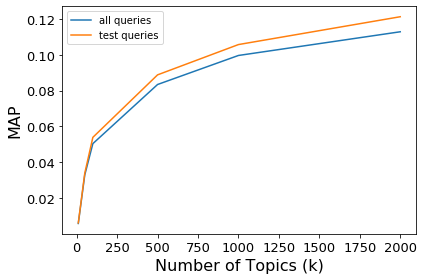

In [100]:
plot_finetuning('lsi_bow', [[10,50,100,500,1000,2000]], ["Number of Topics (k)"])

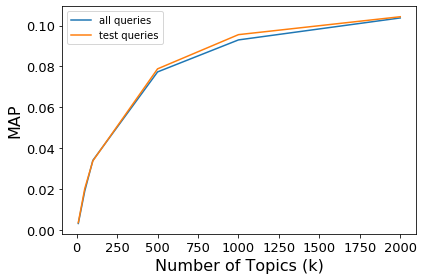

In [101]:
plot_finetuning('lsi_tfidf', [[10,50,100,500,1000,2000]], ["Number of Topics (k)"])

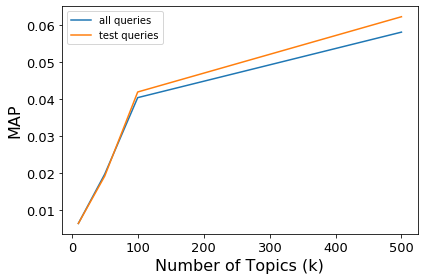

In [157]:
plot_finetuning('LDA', [[10,50,100,500]], ["Number of Topics (k)"])

In [136]:
def get_top_flop_queries(json_path, num_top_flop=1):
    with open(json_path) as json_file:
        data = json.load(json_file)
    data = [(k, v['map']) for k, v in data.items()]
    data.sort(key= lambda t: -t[1])
    return data[:num_top_flop], list(reversed(data[-num_top_flop:]))

In [155]:
top, flop = get_top_flop_queries("doc2vec_best.json", 5)
print("top: ", top)
print("flop: ", flop)

top:  [('159', 0.2924790613098685), ('135', 0.22246631121687538), ('182', 0.07050199228381865), ('142', 0.06467418106770359), ('89', 0.060794923931915955)]
flop:  [('170', 1.4823124892804002e-05), ('63', 3.092603370093473e-05), ('171', 3.281587159437989e-05), ('158', 3.780297062258566e-05), ('181', 4.863659723829491e-05)]


In [156]:
qrels, queries = read_qrels()
print("Top queries:")
for qid, Map in top:
    print("\t - "+queries[qid])
print("Flop queries:")
for qid, Map in flop:
    print("\t - "+queries[qid])

Top queries:
	 -   Electric Car Development 

	 -   Possible Contributions of Gene Mapping to Medicine 

	 -   Commercial Overfishing Creates Food Fish Deficit 

	 -   Impact of Government Regulated Grain Farming on International Relations 

	 -   "Downstream" Investments by OPEC Member States 

Flop queries:
	 -   The Consequences of Implantation of Silicone Gel Breast Devices 

	 -   Machine Translation 

	 -   Use of Mutual Funds in an Individual's Retirement Strategy 

	 -   Term limitations for members of the U.S. Congress 

	 -   Abuse of the Elderly by Family Members, and Medical and Nonmedical Personnel, and Initiatives Being Taken to Minimize This Mistreatment 



In [97]:
def map_variance_over_models(json_files, top_num=5):
    query_variances = {}
    data = {}
    map_per_query = defaultdict(list)
    for i, file in enumerate(json_files):
        with open(file) as json_file:
            data[i] = json.load(json_file)
    for query in data[0]:
        for model in range(len(json_files)):
            map_per_query[query].append(data[model][query]['map'])
    for k in map_per_query:
        query_variances[k] = np.var(map_per_query[k])
    query_variances = [(k, v) for k, v in query_variances.items()]
    query_variances.sort(key= lambda t: -t[1])
    return query_variances[:top_num]

In [168]:
top_var = map_variance_over_models(["lsi_bow2000.json", "lsi_tfidf2000.json", "LDA500.json", "w2v.json", "doc2vec_best.json"], top_num=5)
print(top_var)

[('70', 0.07891609682736177), ('170', 0.07683232500798233), ('163', 0.07531983098970388), ('154', 0.054296903987087065), ('173', 0.052207602106166505)]


In [169]:
print("Highest variance:")
for qid, Map in top_var:
    print("\t - "+queries[qid])

Highest variance:
	 -   Surrogate Motherhood 

	 -   The Consequences of Implantation of Silicone Gel Breast Devices 

	 -   Vietnam Veterans and Agent Orange 

	 -   Oil Spills 

	 -   Smoking Bans 

